In [1]:
import pandas as pd

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploader = files.upload()

Saving heart.csv to heart.csv


In [23]:
df = pd.read_csv('heart.csv')

In [39]:
print(f'Total data :{df.shape[0]}')
print(f'Total features :{df.shape[1]}')
print(f'Data shape :{df.shape}')

Total data :303
Total features :14
Data shape :(303, 14)


In [24]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

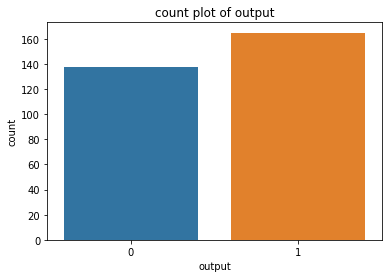

In [32]:
sns.countplot(df['output'])
plt.title('count plot of output')
plt.show()

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

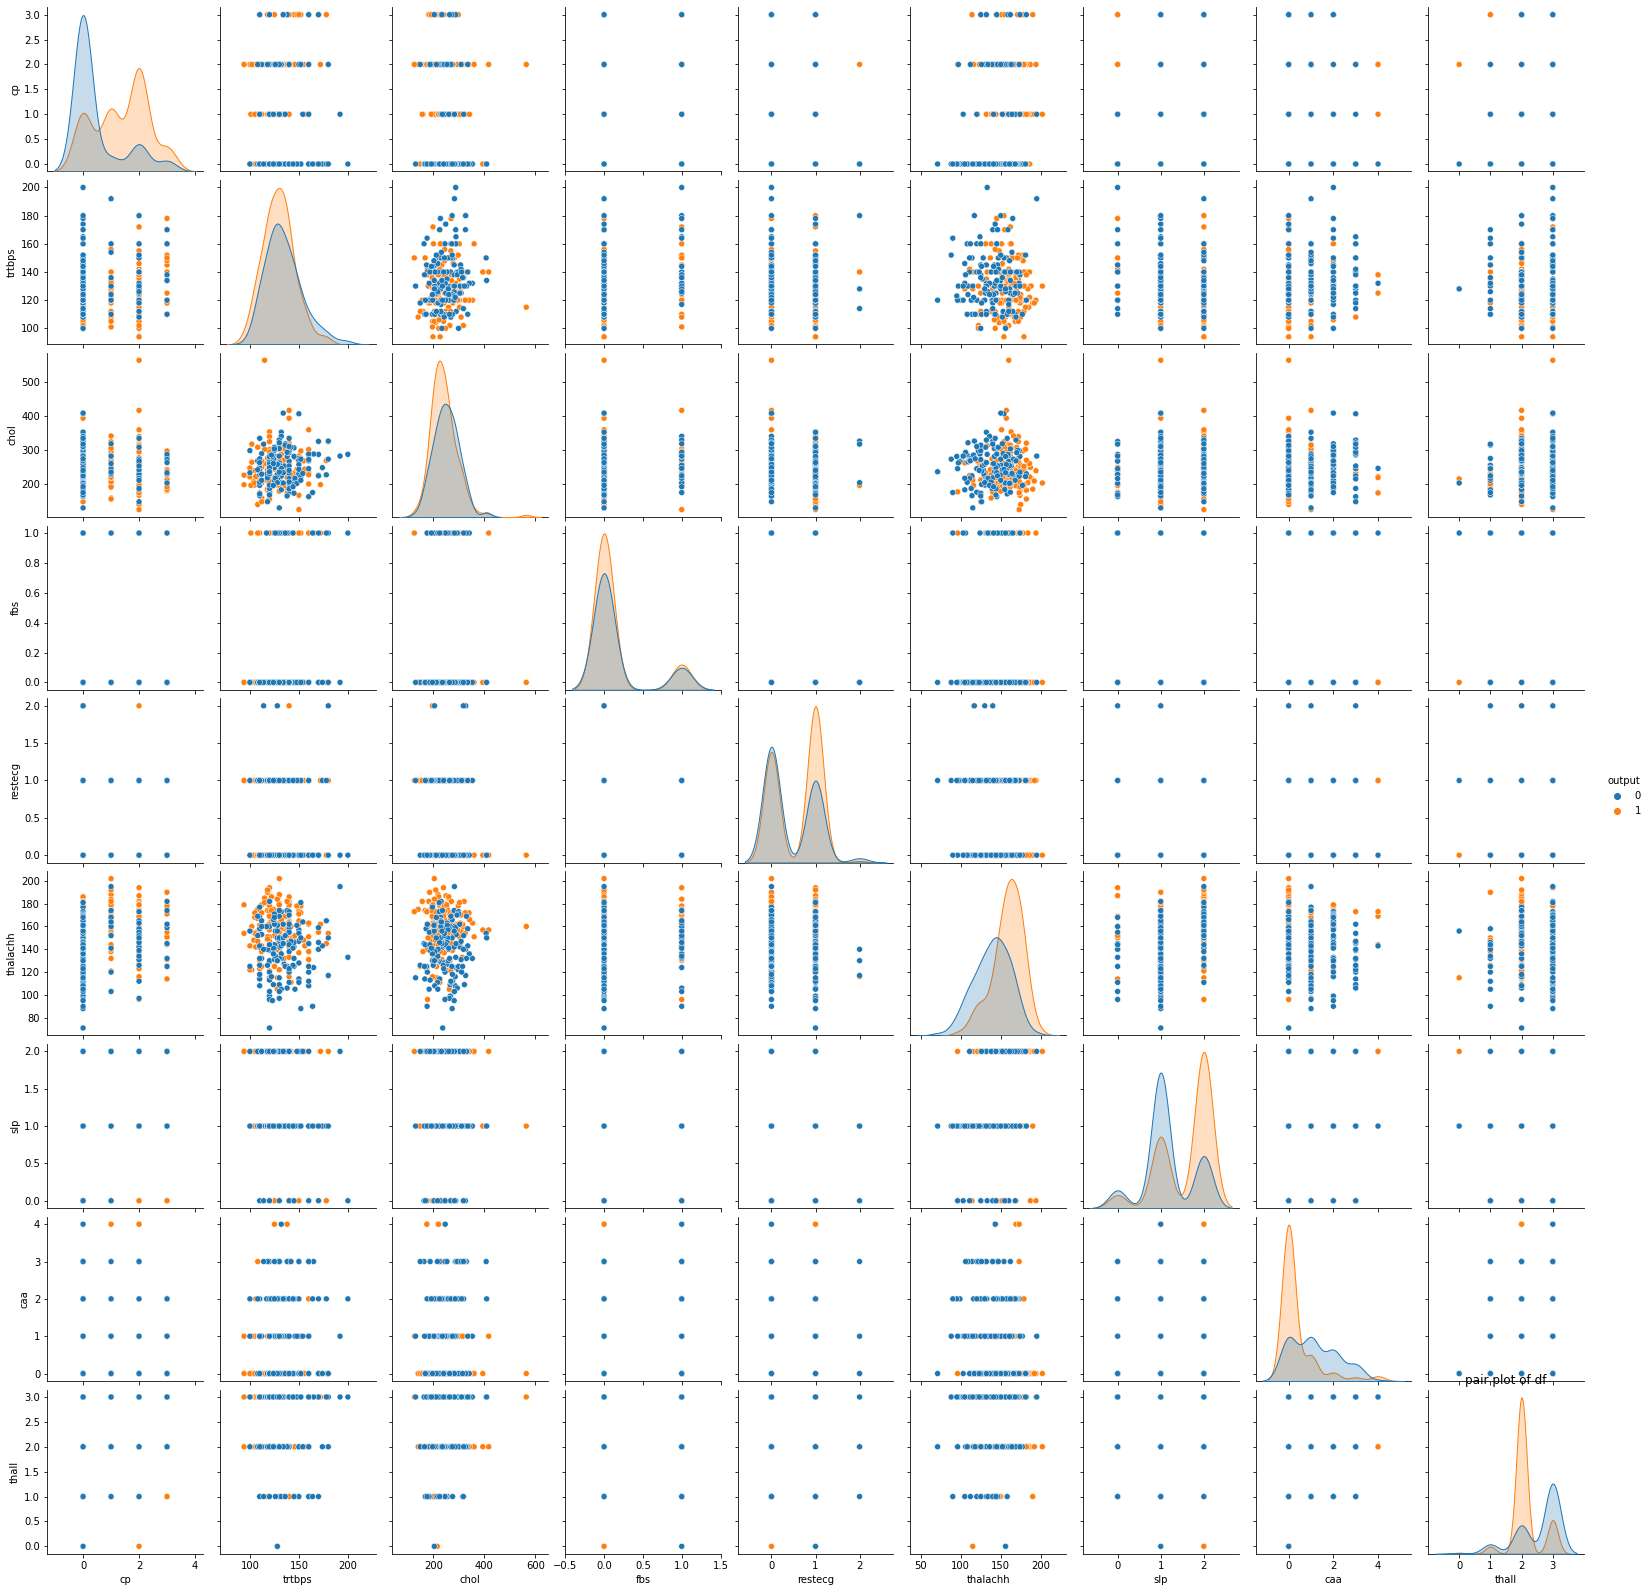

In [34]:
sns.pairplot(df[['cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'slp', 'caa', 'thall', 'output']],hue = 'output')
plt.title('pair plot of df')
plt.show()

In [48]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

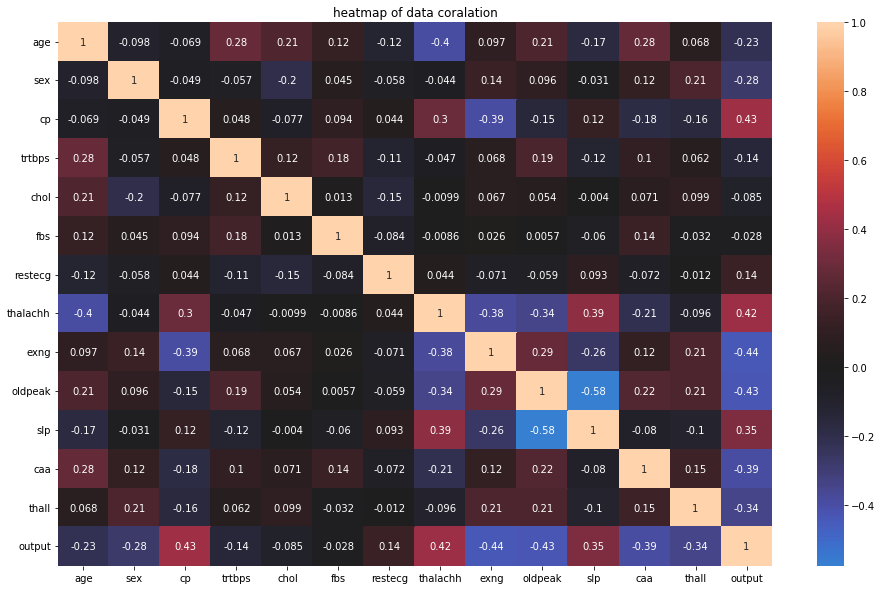

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),center = 0,annot = True)
plt.title('heatmap of data coralation')
plt.show()

In [66]:
X = np.array(df.drop('output',axis = 1))
Y = np.array(df['output'])

In [67]:
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


In [68]:
import torch
import torch.nn as nn

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 20,random_state = 5)

In [106]:
x_train = torch.tensor(X_train,dtype = torch.float32)
x_test = torch.tensor(X_test,dtype = torch.float32)

y_train = torch.tensor(Y_train.reshape(-1,1),dtype = torch.float32)
y_test = torch.tensor(Y_test.reshape(-1,1),dtype = torch.float32)

In [107]:
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')

print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: torch.Size([283, 13])
x_test: torch.Size([20, 13])
y_train: torch.Size([283, 1])
y_test: torch.Size([20, 1])


In [108]:
class Net(torch.nn.Module):            
  def __init__(self):
    super().__init__()
    self.linear1 = torch.nn.Linear(13,32)
    self.linear2 = torch.nn.Linear(32,16)
    self.linear3 = torch.nn.Linear(16,1)
    self.activation =torch.nn.ReLU()


  def forward(self,x):
    x=self.linear1(x)
    x = self.activation(x)
    x=self.linear2(x)
    x = self.activation(x)
    x=self.linear3(x)
    return x 

In [109]:
model = Net()

In [110]:
criterion = torch.nn.MSELoss()
LearningRate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=LearningRate)

In [111]:
num_epochs = 500
loss_list = []
for epoch in range(num_epochs):
  y_hat = model(x_train)
  loss = criterion(y_hat,y_train)
  loss_list.append(loss.item())

  # backward
  loss.backward()
  # update
  optimizer.step()

  optimizer.zero_grad()

  if epoch % 50 == 0:
    print(f'Epoch: [{epoch+1}/{num_epochs}] Loss: [{loss.item():.6f}]')


Epoch: [1/500] Loss: [18.496422]
Epoch: [51/500] Loss: [0.306518]
Epoch: [101/500] Loss: [0.213745]
Epoch: [151/500] Loss: [0.186547]
Epoch: [201/500] Loss: [0.169094]
Epoch: [251/500] Loss: [0.157268]
Epoch: [301/500] Loss: [0.148773]
Epoch: [351/500] Loss: [0.141955]
Epoch: [401/500] Loss: [0.136355]
Epoch: [451/500] Loss: [0.132058]


In [112]:
y_pred = model(x_test)

In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [114]:
# Models
from sklearn.tree  import DecisionTreeClassifier
# Metrics
from sklearn import metrics

In [115]:
def evaluate_model(y_pred, y_test):
  
    print('Acc:', metrics.accuracy_score(y_test, y_pred)*100)

    print('F1:', metrics.f1_score(y_test, y_pred)*100)

    print('Recall:', metrics.recall_score(y_test, y_pred)*100)

    print('Precision:', metrics.precision_score(y_test, y_pred)*100)

    print('Matriz de Confusão:\n') 

    sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

In [116]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_features=9, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Acc: 90.0
F1: 88.8888888888889
Recall: 100.0
Precision: 80.0
Matriz de Confusão:



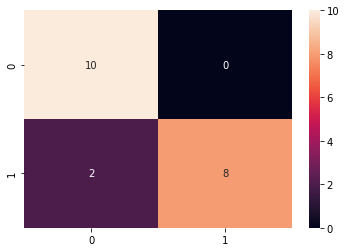

In [117]:
evaluate_model(y_pred, y_test)